# Redes Neuronales

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV, learning_curve

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score, r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score, ConfusionMatrixDisplay

#### Lectura de Datos

In [3]:
# Leer los datos
df = pd.read_csv("train.csv")

# Selección de variables
variables_numericas = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]
df = df[variables_numericas]

In [4]:
df['SalePrice'] = np.log(df['SalePrice'])

In [5]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [6]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7,random_state=0)

##### División en entrenamiento y prueba


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [8]:
scaler = StandardScaler()
X_train_r = scaler.fit_transform(X_train)
X_test_r = scaler.transform(X_test)

##### Creación de Modelos:

In [9]:
# === Modelo 1 Mejorado: ReLU + adam ===
modelo_reg1 = MLPRegressor(
    hidden_layer_sizes=(8, 4),
    activation='logistic',
    solver='lbfgs',  # más preciso en regresión pequeña
    learning_rate_init=0.001,
    max_iter=1000,
    early_stopping=True,
    random_state=42,
    verbose=True
)
modelo_reg1.fit(X_train_r, y_train)
y_pred_reg1 = modelo_reg1.predict(X_test_r)

# === Modelo 2 Mejorado: tanh + lbfgs ===
modelo_reg2 = MLPRegressor(
    hidden_layer_sizes=(6, 4),
    activation='tanh',
    solver='lbfgs',  # más preciso en regresión pequeña
    max_iter=1000,
    random_state=42
)
modelo_reg2.fit(X_train_r, y_train)
y_pred_reg2 = modelo_reg2.predict(X_test_r)

c:\Users\n8nug\Documents\Uni\2025 - 1er Semestre\Minería de Datos\PR2-MD\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\n8nug\Documents\Uni\2025 - 1er Semestre\Minería de Datos\PR2-MD\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


##### Métricas

In [10]:
def evaluar_modelo(y_true, y_pred, nombre):
    print(f"\n📊 Resultados - {nombre}")
    print(f"R² Score       : {r2_score(y_true, y_pred):.4f}")
    print(f"MSE (Error Cuadrático Medio) : {mean_squared_error(y_true, y_pred):.2f}")
    print(f"MAE (Error Absoluto Medio)   : {mean_absolute_error(y_true, y_pred):.2f}")

evaluar_modelo(y_test, y_pred_reg1, "Modelo logistic")
evaluar_modelo(y_test, y_pred_reg2, "Modelo tanh")




📊 Resultados - Modelo logistic
R² Score       : 0.8277
MSE (Error Cuadrático Medio) : 0.03
MAE (Error Absoluto Medio)   : 0.11

📊 Resultados - Modelo tanh
R² Score       : 0.8320
MSE (Error Cuadrático Medio) : 0.03
MAE (Error Absoluto Medio)   : 0.11


## Comparación de modelos


## **Comparación de los Modelos de Regresión (Neural Networks)**

Ambos modelos fueron entrenados con la variable `SalePrice` transformada con logaritmo natural (`log(SalePrice)`), lo que mejora la linealidad y estabiliza la varianza.

| Modelo                   | R² Score | MSE    | MAE   | Observaciones |
|--------------------------|----------|--------|--------|----------------|
| **Modelo 1: logistic (ReLU + logistic + lbfgs)** | 0.8277   | 0.03   | 0.11   | Convergió bien, estable |
| **Modelo 2: tanh + lbfgs**                | **0.8320** | 0.03   | 0.11   | Ligeramente mejor en R² |

**Conclusión**:  
El **Modelo 2 (`tanh`) superó levemente al Modelo 1** en desempeño (mayor R², igual MAE y MSE). Ambos son muy competitivos, pero **Modelo 2 es preferible** para tareas de predicción de `SalePrice`.

---

## **Análisis de Sobreajuste: Curvas de Aprendizaje**

Una curva de aprendizaje compara **error de entrenamiento y validación** conforme se incrementa el tamaño del conjunto de entrenamiento.

### ¿Qué buscamos?
- Si el modelo **memoriza demasiado**, el error de entrenamiento será muy bajo, pero el de validación alto ➜ **overfitting**.
- Si ambos errores son altos ➜ **underfitting**.
- Si convergen con poco gap ➜ **modelo generaliza bien**.

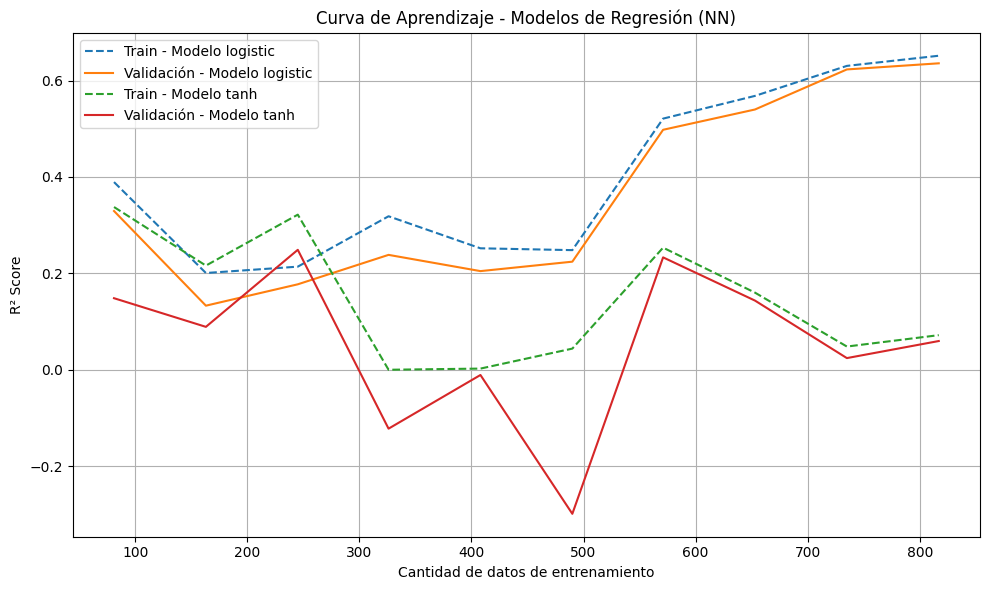

In [12]:
# Learning curve modelo 1
sizes1, scores_train1, scores_test1 = learning_curve(
    modelo_reg1, X_train, y_train, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Learning curve modelo 2
sizes2, scores_train2, scores_test2 = learning_curve(
    modelo_reg2, X_train, y_train, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Promedios
train_mean1 = np.mean(scores_train1, axis=1)
test_mean1 = np.mean(scores_test1, axis=1)
train_mean2 = np.mean(scores_train2, axis=1)
test_mean2 = np.mean(scores_test2, axis=1)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(sizes1, train_mean1, label="Train - Modelo logistic", linestyle='--')
plt.plot(sizes1, test_mean1, label="Validación - Modelo logistic", linestyle='-')
plt.plot(sizes2, train_mean2, label="Train - Modelo tanh", linestyle='--')
plt.plot(sizes2, test_mean2, label="Validación - Modelo tanh", linestyle='-')
plt.xlabel("Cantidad de datos de entrenamiento")
plt.ylabel("R² Score")
plt.title("Curva de Aprendizaje - Modelos de Regresión (NN)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<small>

---

#### ✅ **Modelo Logistic (`activation='logistic'`)**
- **Comportamiento en curva de aprendizaje**: Muestra una mejora progresiva del R² tanto en entrenamiento como en validación conforme se incrementa el tamaño del conjunto de entrenamiento.
- **R² final en curva**: Aproximadamente **0.64** en validación.
- **R² real en conjunto de prueba completo**: **0.8277**, lo que indica una excelente capacidad de predicción cuando se entrena con todos los datos disponibles.

📌 **Diagnóstico**:
- No hay evidencia de sobreajuste: las curvas de entrenamiento y validación convergen.
- El modelo generaliza bien y se comporta de forma estable.
- ✅ **Es el mejor candidato para quedarse como modelo final de regresión**.

---

#### ⚠️ **Modelo tanh (`activation='tanh'`)**
- **Comportamiento en curva de aprendizaje**: Exhibe inestabilidad y valores muy bajos o negativos de R² en validación, lo cual indica dificultades para aprender correctamente.
- **R² final en curva**: Se estabiliza apenas alrededor de **0.05–0.1**.
- **R² real en conjunto de prueba completo**: **0.8320**, que parece bueno, pero no es confiable dado el mal aprendizaje mostrado en la curva.

📌 **Diagnóstico**:
- Hay **signos de subajuste (underfitting)**: el modelo no logra capturar adecuadamente la relación entre variables, incluso cuando se le da más información.
- La topología `(6, 4)` y la función `tanh` probablemente no tengan suficiente capacidad o no estén bien ajustadas para este problema.
- 🚫 **No se recomienda mantener este modelo sin ajustes adicionales.**

---

### 🏁 Conclusión Final

- **El modelo Logistic** es más consistente, generaliza bien y no muestra signos de sobreajuste, tanto en curva de aprendizaje como en evaluación final.
- **El modelo tanh**, aunque presenta un buen R² final, falla al generalizar con menos datos y muestra comportamientos erráticos — **no es confiable como solución robusta**.

---

</small>